In [1]:
import os
import pandas as pd
import datetime as dt
os.chdir('c:\\datacamp\\data\\')
ride_sharing = pd.read_csv('ride_sharing.csv')

# Data Cleaning in Python

## Chapter 1 - Common Data Problems

### Data Type Constraints

Python has data types for every type of data we will encounter: strings, integers, floats, booleans, datetime and category data. One of the first steps in evaluating data cleanliness is to ensure the variables have the correct data types. 

#### Strings to Integers

Looking at the sales data below, there are sales revenue and quantity sold by sales order ID. The revenue column has the $ on the right hand side and a inspection of the .dtypes of the DataFrame show that the Revenue column is defined as an object data type, which is Pandas way of storing strings. 

Trying to calculate all of the total sales using the .sum() method on the Revenue column will simply return a concatenation of all of the values in the Revenue column.

In [2]:
sales = pd.read_csv('sales.csv')
sales.head(2)

,SalesOrderID,Revenue,Quantity
0,43659,54405$,75
1,43660,41577$,57


In [5]:
sales.dtypes

SalesOrderID     int64
Revenue         object
Quantity         int64
dtype: object

In [6]:
sales['Revenue'].sum()

'54405$41577$63776$19723$101171$119358$116609$147316$145190$109962$33846$83215$11554$15603$144653$123742$39187$50360$62844$147260$16487$36533$66521$68008$34788$73183$28390$117442$17036$60003$7113$65944$149530$141015$103087$103704$75114$135949$141284$17358$147998$54128$134880$11186$84463$146765$22156$28040$97665$38221$47985$143841$140043$50690$5722$98312$133569$32997$26323$113386$9046$111947$71566$75420$19663$51424$98811$129044$131144$46102$28285$23004$3360$122645$40275$134621$144034$108678$140850$110679$86664$132000$38465$56913$133180$14664$123942$54208$83118$22699$19811$1819$32497$132102$66994$38489$105834$134530$99448$10355$16749$93900$121809$49626$38645$99566$115650$48247$97517$64767$27948$20982$147388$101025$147003$5990$70544$108956$5081$128117$13648$89621$73933$69953$39078$104833$27406$22480$134520$64685$76387$108324$76009$104452$99967$128476$10335$41741$26983$75063$129334$132006$79885$80623$83890$19854$84677$94347$133621$67886$139138$65894$28889$118791$11862$14096$64582$13536$119

To fix this outcome, the $ sign needs to be removed from the string using the .str.strip() method and passing it '$' as the string to strip from the column values. Then the string data type needs to be converted to an 'int' using the .astype() method. If the revenue column included decimals, the value 'float' would have been passed to the .astype() method. 

To verify that the Revenue column now has an 'int' dtype, use an assert statement. If nothing is returned, the assertion is true.  

In [3]:
sales['Revenue'] = sales['Revenue'].str.strip('$')
sales['Revenue'] = sales['Revenue'].astype('int')

assert sales['Revenue'].dtype =='int'

#### Numerical or Categorical?

A common type of data seems numeric, but is a category with a finite set of possible options is called categorical data. 

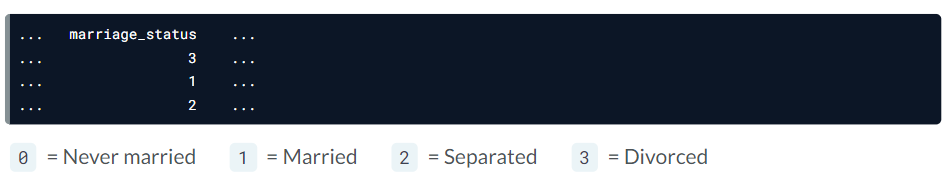

A review of the marriage_status column shows the values are numbers between 0 and 3, depending on the marriage status of the respondent. As integers, these values can lead to misleading information, such as running the .describe() method on the column.

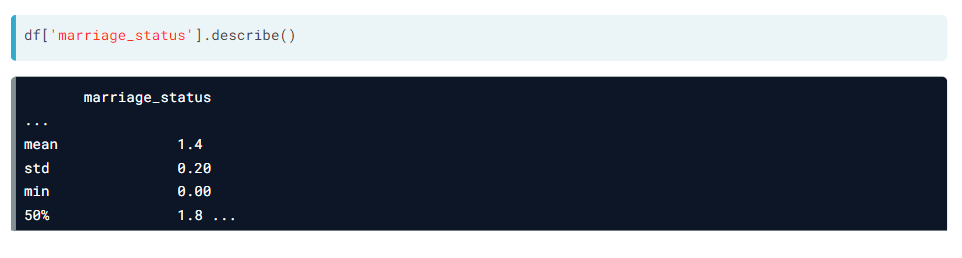

To solve this, use the same .astype() method to change the data type to 'category'. With the conversion, the .describe() method provides information aligned with that of a categorical variable: the number of observations, the number of categories and the most frequent category. 

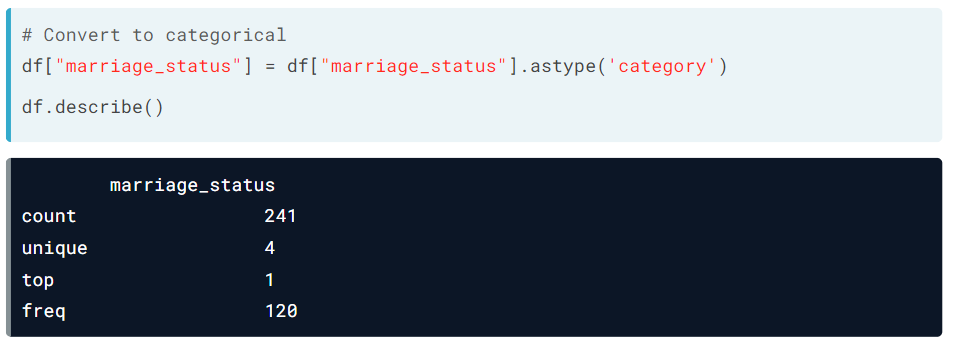

### Exercise 1

#### Numeric data or ... ?

In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called ride_sharing. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The user_type column contains information on whether a user is taking a free ride and takes on the following values:
* 1 for free riders.
* 2 for pay per ride.
* 3 for monthly subscribers.

In this instance, you will print the information of ride_sharing using .info() and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The pandas package is imported as pd.

__Instructions:__
* Print the information of ride_sharing.
* Use .describe() to print the summary statistics of the user_type column from ride_sharing.
* Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.
* Make sure you converted user_type_cat correctly by using an assert statement.

In [4]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.8+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


#### Summing strings and concatenating numbers

In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

__Instructions:__
* Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.
* Convert duration_trim to int and store it in the duration_time column.
* Write an assert statement that checks if duration_time's data type is now an int.
* Print the average ride duration.

In [5]:
#Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')


# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])

print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


### Data Range Constraints

Data often has a range of values, for example, movie ratings, ranging from 1 - 5. 

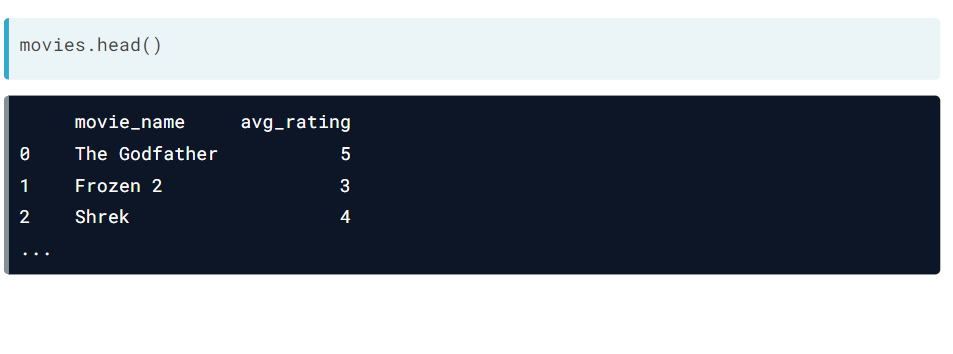

A histograph of the data shows that there are some movies with a rating of 6, above the defined range. 

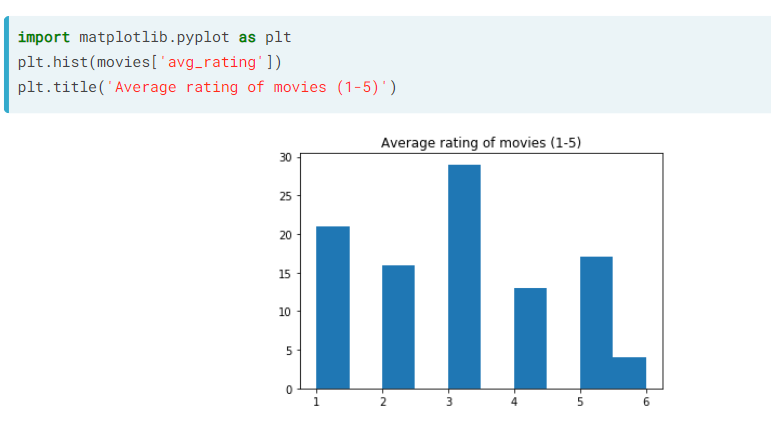

Another example is this dataset of subscriptions for a service. There is one date that is set in the future and doesn't make sense. 

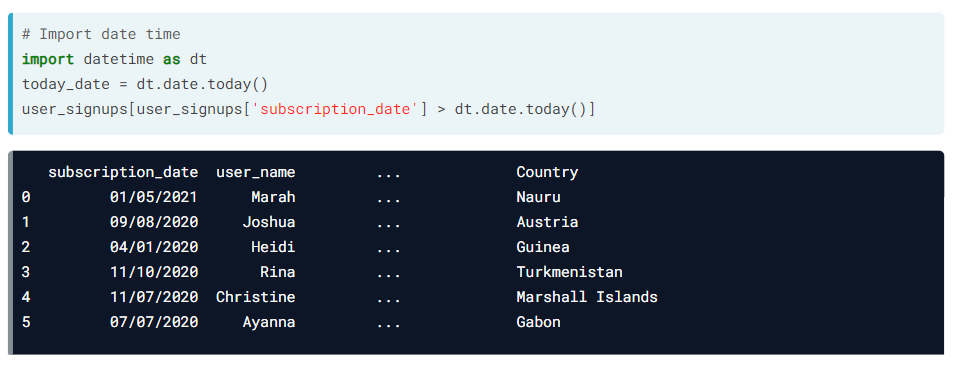

#### How To Deal with Out of Range Data

There are variety of options to manage out of range data, with dropping those rows being the easiest, but depending on the size of the out of range data, it is possible to lose important data points. Other options include setting custom minimums and maximums for the data or to treat the out of range values as missing and impute them by inferring a value based on the out of range value and the range of values. Another option is to set a custom value that is driven by business assumptions.

Regarding the movies DataFrame, the first step is to isolate the movies with a rating higher than 5.

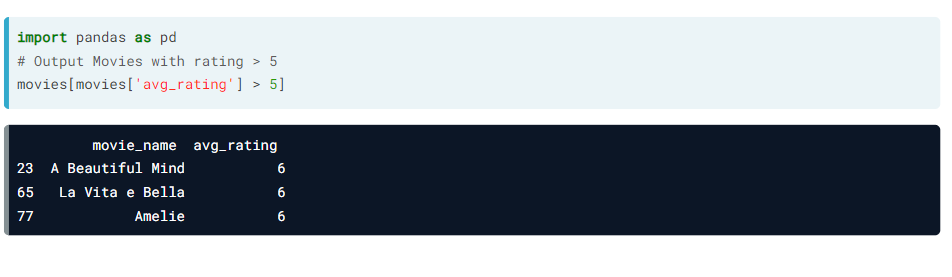

Because it's such a small number of entries that are out of range, it makes sense to drop these entries by either creating a new DataFrame that filters entries with a rating value of 5 or less or by using the .drop() argument that drops the entries that have a rating value higher than 5.

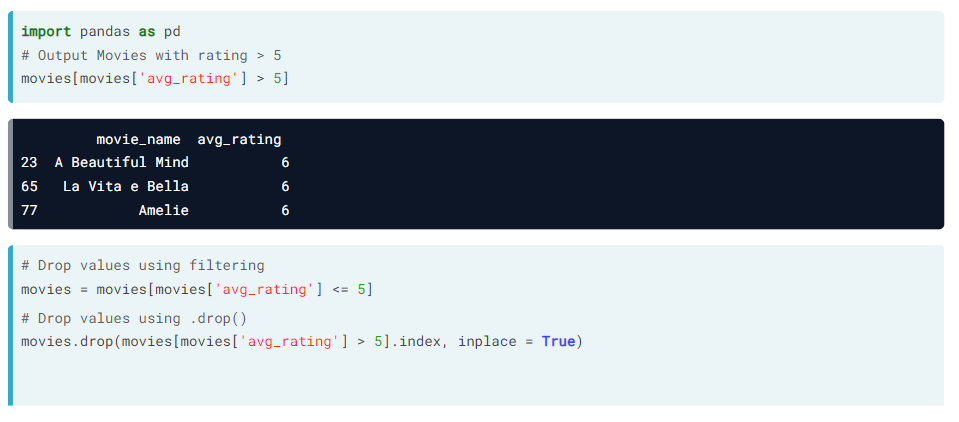

Another option is to convert the values greater than 5 to be 5 using the  .loc method to find all the ratings greater than 5 and setting to 5. 

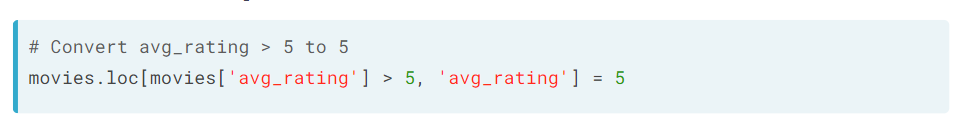

### Exercise 2

#### Tire size constraints

In this lesson, you're going to build on top of the work you've been doing with the ride_sharing DataFrame. You'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

__Instructions:__
* Convert the tire_sizes column from category to 'int'.
* Use .loc[] to set all values of tire_sizes above 27 to 27.
* Reconvert back tire_sizes to 'category' from int.
* Print the description of the tire_sizes.

In [6]:
ride_sharing = pd.read_csv('ride_sharing2.csv')

# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     78
unique     2
top       27
freq      45
Name: tire_sizes, dtype: int64


#### Back to the future

A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the ride_date column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert ride_date to a datetime object.

The datetime package has been imported as dt, alongside all the packages you've been using till now.

__Instructions:__
* Convert ride_date to a datetime object and store it in ride_dt column using to_datetime().
* Create the variable today, which stores today's date by using the dt.date.today() function.
* For all instances of ride_dt in the future, set them to today's date.
* Print the maximum date in the ride_dt column.

In [7]:
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])


# Save today's date
today = dt.date.today()
today = pd.to_datetime(today)

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2020-08-11 00:00:00


### Uniqueness Constraints

#### Duplicate Values

Another common data problem is duplicate values. This is when the exact same rows are repeated for some or all columns in the DataFrame. In addition to human errors and possible bugs and design errors, often duplicate data comes from joining or consolidating data with a merge.

#### Finding Duplicate Values

Using the .duplicated() method on a DataFrame will return a series of boolean values that are True for duplicated values and False for non-duplicated values. Subsetting the DataFrame with that series will provide a subset of the duplicated values only where all of the columns are duplicated not including the first value (it's the first and not a duplicate) it find which can result in misleading information. Using .duplicated() arguments can assist with this.

The subset = argument takes a list of column names to check for duplication
The keep = argument accepts 'first', 'last' or False which results in keeping all of the duplicated values

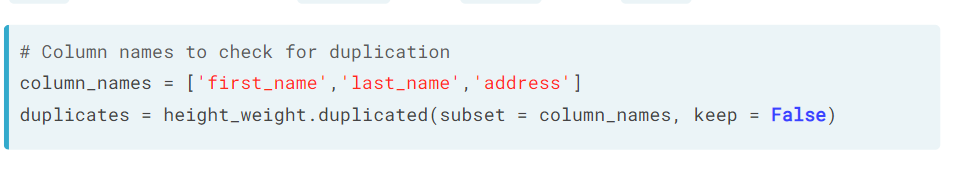

Using this duplicated series will provide better results when the dataframe is subsetted with it.

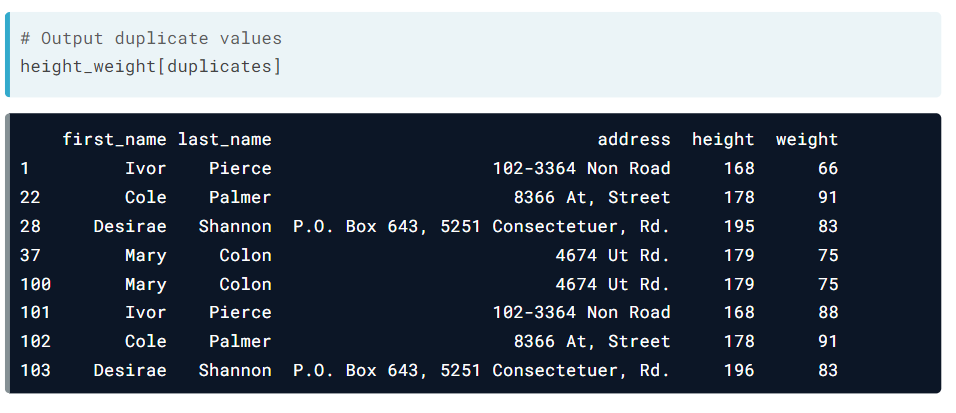

Adding the .sort_values(by = 'column_name') will make it easier to review the duplicated entries. 

#### Treating Duplicate Values

For the complete duplicates, where all the rows have the same values in each column, the .drop_duplicates() method can be used to eliminate one of the exact duplicate rows. It uses the same keyword arguments as the .duplicated() method with the same meanings for both subset = and keep = . There is also an inplace = agrument that, when set to True, drops the duplicated rows directly inside the DataFrame without creating a new DataFrame object. 

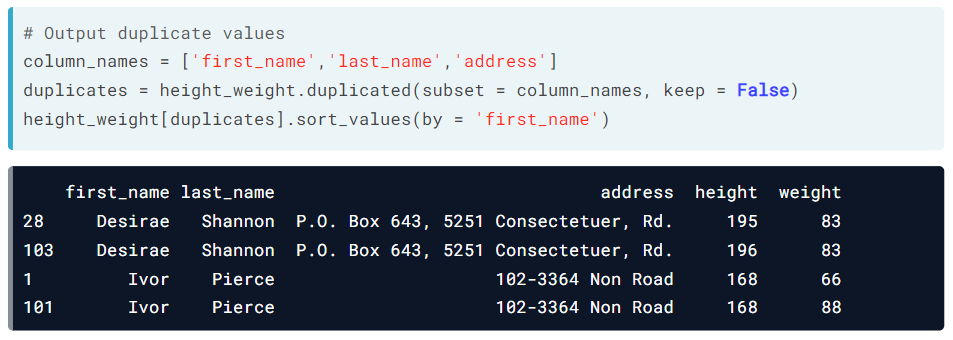

When there are small discrepencies, like the names and addresses are the same, even the height is the same, but the weight is not, in the case of Ivor Pierce, statistical measures can be used to combine the data, using measurements like max, min, average or other statistical methods using the .groupby() method and chaining it with the .agg() method. 

For this height and weight data, a dictionary is created that specifies the height column should use the max value and the weight column should use the mean value and then pass this dictionary into the .agg() method. 

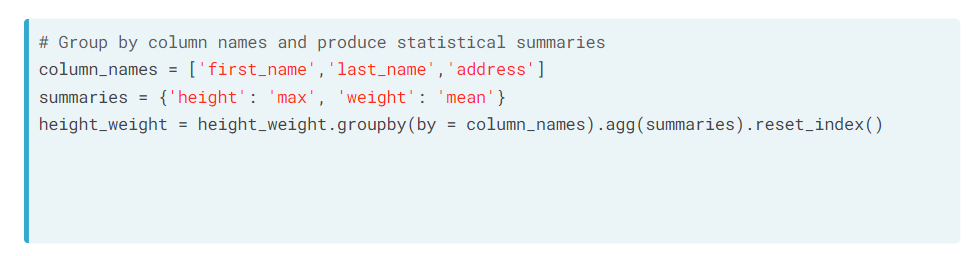

### Exercise 3

#### Finding duplicates

A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of ride_sharing is in your environment, as well as all the packages you've been working with thus far.

__Instructions:__
* Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.
* Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.
* Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.

In [8]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

    ride_id  duration  user_birth_year
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060


#### Treating duplicates

In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the user_birth_year and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.

__Instructions:__
* Drop complete duplicates in ride_sharing and store the results in ride_dup.
* Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.
* Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.
* Find duplicates again and run the assert statement to verify de-duplication.

In [9]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby(by='ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0